In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/FacialAcne.zip" -d "/content/train/"

Archive:  /content/drive/MyDrive/FacialAcne.zip
  inflating: /content/train/FacialAcne/2652__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDBd.jpg  
  inflating: /content/train/FacialAcne/acne-039-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-077-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-089-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-187-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-205-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-268-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: /content/train/FacialAcne/acne-comedones-57-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDE3XQ.jpg  
  inflating: /content/train/FacialAcne/acne-face-1__ProtectW

In [3]:
!unzip "/content/drive/MyDrive/Wrinkled.zip" -d "/content/train/"

Archive:  /content/drive/MyDrive/Wrinkled.zip
  inflating: /content/train/Wrinkled/000_Par2716506.jpg  
  inflating: /content/train/Wrinkled/0000173.jpg  
  inflating: /content/train/Wrinkled/0000174.jpg  
  inflating: /content/train/Wrinkled/0000175.jpg  
  inflating: /content/train/Wrinkled/0000176.jpg  
  inflating: /content/train/Wrinkled/0000177.jpg  
  inflating: /content/train/Wrinkled/0000178.jpg  
  inflating: /content/train/Wrinkled/0000179.jpg  
  inflating: /content/train/Wrinkled/0000180.jpg  
  inflating: /content/train/Wrinkled/0000181.jpg  
  inflating: /content/train/Wrinkled/0000182.jpg  
  inflating: /content/train/Wrinkled/0000183.jpg  
  inflating: /content/train/Wrinkled/0000184.jpg  
  inflating: /content/train/Wrinkled/0000185.jpg  
  inflating: /content/train/Wrinkled/0000186.jpg  
  inflating: /content/train/Wrinkled/0000187.jpg  
  inflating: /content/train/Wrinkled/0000188.jpg  
  inflating: /content/train/Wrinkled/0000189.jpg  
  inflating: /content/train/W

In [4]:
!unzip "/content/drive/MyDrive/NoWrinkles.zip" -d "/content/train/"

Archive:  /content/drive/MyDrive/NoWrinkles.zip
  inflating: /content/train/NoWrinkles/1.080112b7a989202ddf039eb2fcbf45b8.jpg  
  inflating: /content/train/NoWrinkles/1.3CB079C700000578-4175642-image-a-24_1485865098003.jpg  
  inflating: /content/train/NoWrinkles/1.young-man-takes-a-selfie-PUYABY9.jpg  
  inflating: /content/train/NoWrinkles/10.500_F_219370913_ZvNQT8Qk5dOEKSYDKUc32lrGtzTmUf7t.jpg  
  inflating: /content/train/NoWrinkles/10.chaz_richardson-600x600.jpg  
  inflating: /content/train/NoWrinkles/10.Junaid-Ahmed-selfies-750x750.jpg  
  inflating: /content/train/NoWrinkles/10.square.jpg  
  inflating: /content/train/NoWrinkles/11.3D009FF500000578-4208130-image-a-29_1486649862570.jpg  
  inflating: /content/train/NoWrinkles/11.645Z9308%20copy.jpg  
  inflating: /content/train/NoWrinkles/11.cd3929b6f372a68b1c6e18ab29df3983.jpg  
  inflating: /content/train/NoWrinkles/11.kenzie%2520Press%2520Shot%25204.jpg  
  inflating: /content/train/NoWrinkles/11.natasha-c.jpg  
  inflating: 

In [5]:
import glob
import os
import shutil
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
import datetime
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D ,Dense
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions, EfficientNetB0
import tensorflow as tf
%load_ext tensorboard


In [6]:
rm -rf "/content/logs/"

In [7]:
FILE_PATH = "/content/train"
os.mkdir("/content/training") if not os.path.exists("/content/training") else None
DEST_PATH = "/content/training"

In [8]:
cnt =0
for r,d,f in os.walk(os.path.join(FILE_PATH)):
  if cnt == 0:
    cnt+=1
    continue
  print(r,d,f)
  dir = r.split("/")[-1]
  print(dir)
  for fn in f:
    f1=fn
    if fn.split("_")[0] == dir:
      f1 = "-".join(fn.split("_")[1:])
    os.rename(os.path.join(r,fn),os.path.join(r,dir+"_"+f1))
    shutil.copy(os.path.join(r,dir+"_"+f1),os.path.join(DEST_PATH,dir+"_"+f1))

/content/train/NoWrinkles [] ['85.7e2dabd1e5d53394eb5caff7fc107e31.jpg', 'NoWrinkles_38.3D00A01B00000578-4208130-image-a-45-1486651597477.jpg', 'NoWrinkles_68.51309046_398153827679849_7564735328034933865_n.jpg', 'NoWrinkles_84.14716173850_a655b5c776.jpg', 'NoWrinkles_24._105621935_wayneboylan.jpg', 'NoWrinkles_b40.jpg', 'NoWrinkles_58.avatars-000335022464-ijsx73-t500x500.jpg', '36.57395910_1303959643104037_181808362878089992_n.jpg', 'NoWrinkles_63.selfies.jpg', 'NoWrinkles_48.BJ.jpg', 'NoWrinkles_18.VP-ForeverYoung-Lifestyle-1-16d334fd-ba52-4dc5-a5fd-5739d1f01564-800x.jpg', 'NoWrinkles_10.square.jpg', 'NoWrinkles_68.500-F-141762465-lkw63yZ0K12cb4y0rN1WpG7qZtP5t9EV.jpg', 'NoWrinkles_b20.jpg', 'NoWrinkles_58.65875199_1088162748047680_4478904009626262561_n.jpg', '79.square.jpg', 'NoWrinkles_58.will-and-kate-9-years-old-1552228788-adjust-1552311908.jpg', 'b20.jpg', 'NoWrinkles_32._92387001_selfie2_976.jpg', '29.323739345122_155765536401298.jpg', 'NoWrinkles_66.Teenage-boy-eating-chinese-fo

In [9]:
IMG_DIMS = (224,224)

files = glob.glob("/content/training/*")
images = np.array([img_to_array(load_img(img, target_size=IMG_DIMS)) for img in files])
labels = [fn.split("/")[-1].split("_")[0] for fn in files]
"""df = pd.DataFrame(labels)
label_enc = dict(zip(df[0].unique(),range(len(df[0].unique()))))
print(label_enc)
labels = [label_enc[x] for x in labels]
print(labels[:10])"""

x_train ,x_test ,y_train ,y_test = train_test_split(images, labels,
                                                    test_size = 0.3 ,stratify = np.array(labels),
                                                    random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train ,
                                                  test_size = 0.3 ,stratify = np.array(y_train), 
                                                  random_state= 42)
'''print(x_train,y_test,
      x_val,y_val,
      x_test,y_test)'''
x_train_preprocessed = preprocess_input(x_train)
x_test_preprocessed = preprocess_input(x_test)
x_val_preprocessed = preprocess_input(x_val)

In [10]:
print(x_train_preprocessed.shape,x_test_preprocessed.shape,x_val_preprocessed.shape)

(717, 224, 224, 3) (440, 224, 224, 3) (308, 224, 224, 3)


In [11]:
from keras.utils import to_categorical

y_train_ohe = np.matrix(pd.get_dummies(y_train))
y_test_ohe = np.matrix( pd.get_dummies(y_test))
y_val_ohe = np.matrix(pd.get_dummies(y_val))


In [12]:
print(y_train_ohe.shape,y_test_ohe.shape,y_val_ohe.shape)

(717, 3) (440, 3) (308, 3)


In [13]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = 'true',
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow(x_train,y_train_ohe, shuffle = False, batch_size = BATCH_SIZE, seed =1)


val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(x_val,y_val_ohe, shuffle =False , batch_size = BATCH_SIZE, seed = 1)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

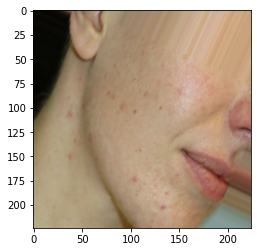

In [15]:
plt.imshow(train_generator[0][0][1])

In [16]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [17]:
base_efficientNet = EfficientNetB0(include_top = False ,weights = 'imagenet', input_shape=(224,224,3))

out = base_efficientNet.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation ='relu')(out)
out = Dense(512, activation ='relu')(out)
total_classes = y_train_ohe.shape[1]

predictions = Dense(total_classes, activation= 'softmax')(out)
model = Model(inputs = base_efficientNet.input, outputs = predictions)

model.layers[0].trainable = True
for layer in model.layers[:-16]:

  layer.trainable = False
for layer in model.layers[-16:]:
  layer.trainable = True
    

model.compile(Adam(lr=0.00002), loss = 'categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
______________________________________________________________________________________________

In [18]:
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0]//batch_size
val_steps_per_epoch = x_val.shape[0]//batch_size

log_dir = "/content/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir ,histogram_freq=1)

history = model.fit(train_generator,
                    steps_per_epoch = train_steps_per_epoch,
                    validation_data = val_generator,
                    validation_steps = val_steps_per_epoch,
                    callbacks = [tensorboard_callback],
                    epochs = 10, verbose = 1)

Epoch 1/10
22/22 [==============================] - 84s 4s/step - loss: 1.1010 - accuracy: 0.3669 - val_loss: 1.0984 - val_accuracy: 0.3472
Epoch 2/10
22/22 [==============================] - 75s 3s/step - loss: 1.1006 - accuracy: 0.3476 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 3/10
22/22 [==============================] - 73s 3s/step - loss: 1.1024 - accuracy: 0.3146 - val_loss: 1.0993 - val_accuracy: 0.3229
Epoch 4/10
22/22 [==============================] - 73s 3s/step - loss: 1.1083 - accuracy: 0.3309 - val_loss: 1.0999 - val_accuracy: 0.3299
Epoch 5/10
22/22 [==============================] - 74s 3s/step - loss: 1.0973 - accuracy: 0.3505 - val_loss: 1.0996 - val_accuracy: 0.3299
Epoch 6/10
22/22 [==============================] - 74s 3s/step - loss: 1.1018 - accuracy: 0.3573 - val_loss: 1.0993 - val_accuracy: 0.3299
Epoch 7/10
22/22 [==============================] - 74s 3s/step - loss: 1.1037 - accuracy: 0.3739 - val_loss: 1.0991 - val_accuracy: 0.3299
Epoch 8/10
22/22 [==

In [19]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [20]:
  from tensorflow.keras.layers.experimental import preprocessing


def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(train_generator, epochs=epochs, validation_data=val_generator, verbose=2)
plot_hist(hist)

Epoch 1/25
23/23 - 78s - loss: 1.0988 - accuracy: 0.3445 - val_loss: 1.0982 - val_accuracy: 0.3474
Epoch 2/25
23/23 - 77s - loss: 1.1038 - accuracy: 0.3305 - val_loss: 1.0982 - val_accuracy: 0.3474
Epoch 3/25
23/23 - 78s - loss: 1.0995 - accuracy: 0.3389 - val_loss: 1.0984 - val_accuracy: 0.3474
Epoch 4/25
23/23 - 78s - loss: 1.0976 - accuracy: 0.3584 - val_loss: 1.0985 - val_accuracy: 0.3182
Epoch 5/25
23/23 - 76s - loss: 1.1047 - accuracy: 0.3431 - val_loss: 1.0985 - val_accuracy: 0.3182
Epoch 6/25
23/23 - 75s - loss: 1.0964 - accuracy: 0.3529 - val_loss: 1.0979 - val_accuracy: 0.3474
Epoch 7/25
23/23 - 77s - loss: 1.1034 - accuracy: 0.3389 - val_loss: 1.0986 - val_accuracy: 0.3474
Epoch 8/25
23/23 - 77s - loss: 1.0932 - accuracy: 0.3445 - val_loss: 1.0984 - val_accuracy: 0.3442
Epoch 9/25
23/23 - 76s - loss: 1.1057 - accuracy: 0.3417 - val_loss: 1.0978 - val_accuracy: 0.4318
Epoch 10/25
23/23 - 75s - loss: 1.0999 - accuracy: 0.3598 - val_loss: 1.0973 - val_accuracy: 0.3214
Epoch 11/

NameError: ignored